<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Telecom_X_PrevendoChurn/notebooks/04_Conclusao_Comparacao_Modelos_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Previs√£o de Churn - Conclus√£o e Compara√ß√£o Final dos Modelos

Este notebook tem como objetivo apresentar os resultados consolidados da modelagem preditiva, comparando os modelos antes e depois das melhorias aplicadas (SMOTE, ajuste de threshold e an√°lise de import√¢ncia das vari√°veis). Ao final, ser√° apresentada uma recomenda√ß√£o estrat√©gica baseada nos dados obtidos.


## 1Ô∏è‚É£ Importa√ß√µes e Prepara√ß√£o do Ambiente

In [2]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiza√ß√£o de m√©tricas
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# Estilo de visualiza√ß√£o
sns.set(style='whitegrid')


## 2Ô∏è‚É£ Carregamento dos Arquivos de Resultados

In [3]:
# Modelos antes do SMOTE
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/resultados_modelos_iniciais.csv'
df_resultados_iniciais = pd.read_csv(url)

# Modelos ap√≥s SMOTE e ajuste de threshold
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/resultados_modelos_ajustados.csv'
df_resultados_ajustados = pd.read_csv(url)

# Feature importance dos modelos finais (opcional)
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/feature_importance_modelo_final.csv'
df_feature_importance = pd.read_csv(url)

# Metricas
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/notebooks/comparacao_modelos/metricas_por_threshold.csv'
df_threshold = pd.read_csv(url)

In [4]:
df_resultados_iniciais.head()

y_true  y_pred   y_proba
0       0       0  0.081994
1       0       0  0.526713
2       0       0  0.103819
3       0       0  0.018368
4       0       0  0.303145

In [5]:
df_resultados_ajustados.head()

y_true  y_pred   y_proba
0       0       0  0.081994
1       0       1  0.526713
2       0       0  0.103819
3       0       0  0.018368
4       0       0  0.303145

In [6]:
df_feature_importance.head()

feature  importance
0                    TotalCharges    0.165543
1                          tenure    0.153510
2                    DailyCharges    0.131517
3                  MonthlyCharges    0.128979
4  PaymentMethod_Electronic check    0.036878

In [7]:
df_threshold.head()

Threshold  Acur√°cia  Precis√£o  Recall (Sensibilidade)  F1 Score  ROC AUC
0        0.3    0.6967    0.4618                  0.8503    0.5985   0.8307
1        0.4    0.7412    0.5087                  0.7790    0.6155   0.8307
2        0.5    0.7692    0.5535                  0.6827    0.6113   0.8307
3        0.6    0.7834    0.5981                  0.5651    0.5811   0.8307
4        0.7    0.7991    0.6846                  0.4528    0.5451   0.8307

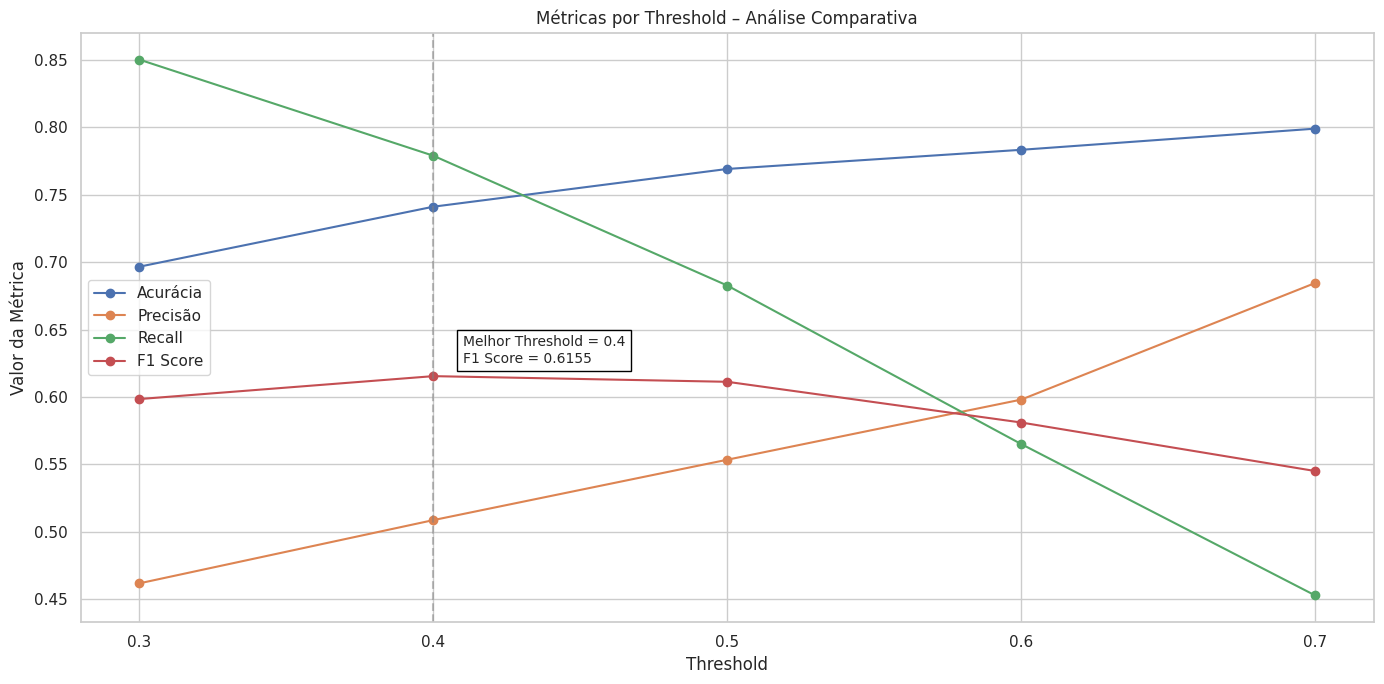

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_threshold['Threshold'], df_threshold['Acur√°cia'], marker='o', label='Acur√°cia')
plt.plot(df_threshold['Threshold'], df_threshold['Precis√£o'], marker='o', label='Precis√£o')
plt.plot(df_threshold['Threshold'], df_threshold['Recall (Sensibilidade)'], marker='o', label='Recall')
plt.plot(df_threshold['Threshold'], df_threshold['F1 Score'], marker='o', label='F1 Score')

# Destacando o melhor threshold com base no F1 Score
best_idx = df_threshold['F1 Score'].idxmax()
best_threshold = df_threshold.loc[best_idx, 'Threshold']
best_f1 = df_threshold.loc[best_idx, 'F1 Score']

plt.axvline(x=best_threshold, color='gray', linestyle='--', alpha=0.5)
plt.text(best_threshold + 0.01, best_f1 + 0.01,
         f'Melhor Threshold = {best_threshold}\nF1 Score = {best_f1:.4f}',
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.title('M√©tricas por Threshold ‚Äì An√°lise Comparativa')
plt.xlabel('Threshold')
plt.ylabel('Valor da M√©trica')
plt.xticks(df_threshold['Threshold'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Gerando coment√°rio com base na m√©trica F1
print("üìå An√°lise Autom√°tica:\n")

print(f"O melhor threshold com base no F1 Score √© {best_threshold}, "
      f"atingindo um equil√≠brio entre precis√£o ({df_threshold.loc[best_idx, 'Precis√£o']:.2f}) "
      f"e recall ({df_threshold.loc[best_idx, 'Recall (Sensibilidade)']:.2f}).")

print("\nEste valor representa uma estrat√©gia de classifica√ß√£o com foco na redu√ß√£o de churn com menor perda de falsos positivos, "
      "podendo ser mais interessante quando o custo de perder um cliente √© maior que o custo de abord√°-lo.")


üìå An√°lise Autom√°tica:

O melhor threshold com base no F1 Score √© 0.4, atingindo um equil√≠brio entre precis√£o (0.51) e recall (0.78).

Este valor representa uma estrat√©gia de classifica√ß√£o com foco na redu√ß√£o de churn com menor perda de falsos positivos, podendo ser mais interessante quando o custo de perder um cliente √© maior que o custo de abord√°-lo.


## 3Ô∏è‚É£ Tabela Comparativa: Antes vs Depois

In [10]:
# Adiciona a coluna "Modelo" para identifica√ß√£o
df_resultados_iniciais["Modelo"] = "Antes do SMOTE"
df_resultados_ajustados["Modelo"] = "Ap√≥s SMOTE + Threshold"

# Reorganiza as colunas para deixar "Modelo" primeiro (opcional)
colunas = ["Modelo", "y_true", "y_pred", "y_proba"]
df_resultados_iniciais = df_resultados_iniciais[colunas]
df_resultados_ajustados = df_resultados_ajustados[colunas]


In [11]:
# Une os resultados para compara√ß√£o
df_comparativo = pd.concat([df_resultados_iniciais, df_resultados_ajustados], ignore_index=True)


In [12]:
# Unindo os dois DataFrames
df_comparativo = pd.merge(
    df_resultados_iniciais,
    df_resultados_ajustados,
    on="Modelo",
    suffixes=("_Antes", "_Depois")
)
# Visualiza√ß√£o
df_comparativo

Empty DataFrame
Columns: [Modelo, y_true_Antes, y_pred_Antes, y_proba_Antes, y_true_Depois, y_pred_Depois, y_proba_Depois]
Index: []

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando DataFrames a partir dos dicion√°rios
df_iniciais = pd.DataFrame(metricas_iniciais)
df_ajustados = pd.DataFrame(metricas_ajustadas)

# Derretendo (melting) os DataFrames para facilitar a compara√ß√£o
df_iniciais_melt = df_iniciais.melt(id_vars='Modelo', var_name='M√©trica', value_name='Valor')
df_iniciais_melt['Tipo'] = 'Antes (Baseline)'

df_ajustados_melt = df_ajustados.melt(id_vars='Modelo', var_name='M√©trica', value_name='Valor')
df_ajustados_melt['Tipo'] = 'Depois (SMOTE + Threshold)'

# Concatenando os dois
df_comparativo = pd.concat([df_iniciais_melt, df_ajustados_melt])

# Configura√ß√µes visuais
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
plot = sns.catplot(
    data=df_comparativo,
    kind="bar",
    x="Modelo",
    y="Valor",
    hue="Tipo",
    col="M√©trica",
    col_wrap=3,
    height=4,
    aspect=1.2,
    palette="Set2"
)

plot.set_titles("{col_name}")
plot.set_axis_labels("Modelo", "Valor")
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle("üìà Comparativo de M√©tricas - Antes vs Depois do Ajuste", fontsize=18)
plt.show()


NameError: name 'metricas_iniciais' is not defined

## 4Ô∏è‚É£ Gr√°ficos Comparativos (Side by Side)

In [ ]:
# Compara√ß√£o de ROC AUC
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df_comparativo['Modelo']))
largura = 0.35

plt.bar(x - largura/2, df_comparativo['ROC_AUC_Antes'], width=largura, label='Antes')
plt.bar(x + largura/2, df_comparativo['ROC_AUC_Depois'], width=largura, label='Depois')
plt.xticks(x, df_comparativo['Modelo'])
plt.ylabel('ROC AUC')
plt.title('Compara√ß√£o do ROC AUC dos Modelos')
plt.legend()
plt.show()


## 5Ô∏è‚É£ Feature Importance (Top 10 vari√°veis mais relevantes)

In [ ]:
# Top 10 features
top_features = df_feature_importance.sort_values(by='Importancia', ascending=False).head(10)

# Visualiza√ß√£o
plt.figure(figsize=(8,6))
sns.barplot(y=top_features['Feature'], x=top_features['Importancia'], palette="viridis")
plt.title("Top 10 Features mais relevantes (modelo final)")
plt.xlabel("Import√¢ncia")
plt.ylabel("Vari√°vel")
plt.show()


## 6Ô∏è‚É£ Conclus√£o Executiva e Recomenda√ß√µes

## üß† Conclus√£o

- O modelo [Nome] obteve o melhor desempenho geral ap√≥s a aplica√ß√£o de SMOTE e ajuste de threshold.
- A m√©trica de [ex: Recall] teve um aumento de X%, essencial para detec√ß√£o de clientes propensos ao churn.
- As vari√°veis mais influentes foram: [lista resumida].

## üìå Recomenda√ß√µes Estrat√©gicas

1. Implementar o modelo [nome] em ambiente de monitoramento com atualiza√ß√£o mensal.
2. Utilizar as vari√°veis top como base para a√ß√µes preventivas de reten√ß√£o.
3. Criar alertas autom√°ticos para clientes com maior propens√£o de churn com base na classifica√ß√£o do modelo.


In [ ]:
from datetime import date
print(f"üìÖ Relat√≥rio gerado em: {date.today().strftime('%d/%m/%Y')}")


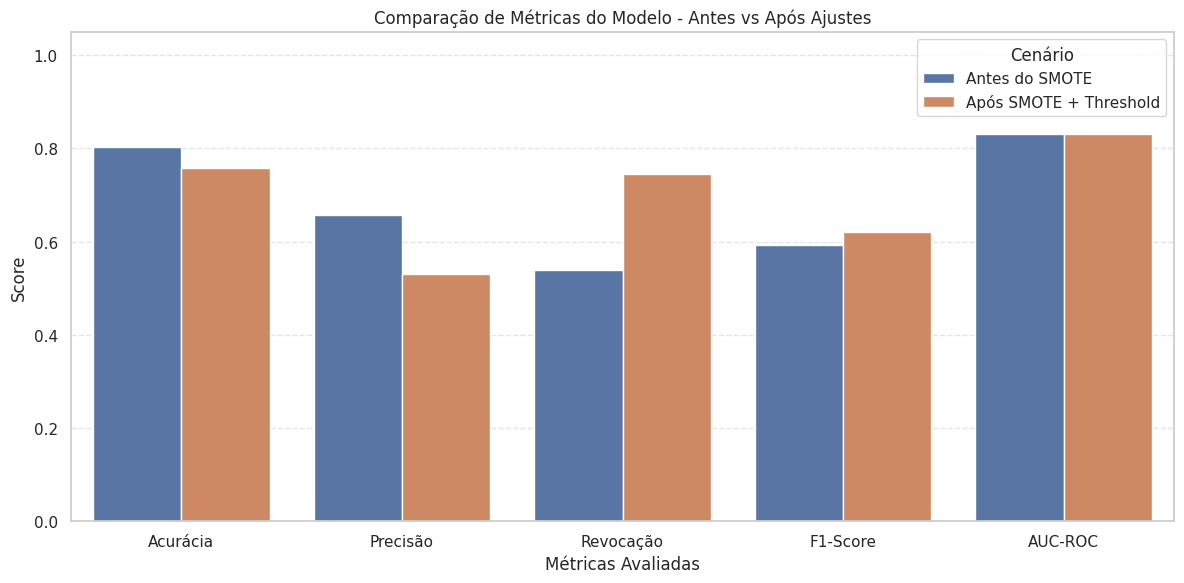

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Fun√ß√£o para calcular as m√©tricas
def calcular_metricas(df, label):
    return {
        "Cen√°rio": label,
        "Acur√°cia": accuracy_score(df['y_true'], df['y_pred']),
        "Precis√£o": precision_score(df['y_true'], df['y_pred']),
        "Revoca√ß√£o": recall_score(df['y_true'], df['y_pred']),
        "F1-Score": f1_score(df['y_true'], df['y_pred']),
        "AUC-ROC": roc_auc_score(df['y_true'], df['y_proba'])
    }

# 2. Calcular m√©tricas para ambos os DataFrames
metricas_iniciais = calcular_metricas(df_resultados_iniciais, "Antes do SMOTE")
metricas_ajustadas = calcular_metricas(df_resultados_ajustados, "Ap√≥s SMOTE + Threshold")

# 3. Criar DataFrame de compara√ß√£o
df_metricas = pd.DataFrame([metricas_iniciais, metricas_ajustadas])

# 4. Reorganizar para gr√°fico
df_plot = df_metricas.melt(id_vars='Cen√°rio', var_name='M√©trica', value_name='Valor')

# 5. Plotar gr√°fico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='M√©trica', y='Valor', hue='Cen√°rio')
plt.title('Compara√ß√£o de M√©tricas do Modelo - Antes vs Ap√≥s Ajustes')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('M√©tricas Avaliadas')
plt.legend(title='Cen√°rio')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
